# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns

In [2]:
from DLtools import  prep_data, LSTMmodel

In [3]:
#rain = 'data/instant_data/rain.csv'
#water = 'data/instant_data/water.csv'
rain = 'data/instant_data/rain_small.csv'
water = 'data/instant_data/water_small.csv'

rw = prep_data.instant_df(rain_csv=rain,water_csv=water)
# df_water = rw.water_df
# df_rain = rw.rain_df
df = rw.df

In [4]:
# SELECT YEAR
#rw.report_missing_by_year()

In [5]:
#rw = prep_data.instant_df(rain_csv=rain,water_csv=water,start='2013')
#df = rw.df

In [6]:
# def report_missing_by_station(df,col):
#     nan_ratio = 0.15
#     print(col[:5])
#     for _col in df.columns:   
#         num_nan = df[_col].isnull().sum()
#         num_total = df.shape[0]
#         if num_nan/num_total > nan_ratio:
#             try:
#                 col.remove(_col)
#             except:
#                 pass
#         else:
#             print("REMAIN Station name {}, ,missing......{} (..{:.2f}%)".format(_col,num_nan,num_nan*100/num_total))
#     print("total data points",num_total)
#     print("remain .......{}...station".format(len(col)))
#     print(col)
#     return col

In [7]:
# print(len(all_col))
# print("ST........AVAL..NAN..ALL.............avaliable ratio")
# all_col = df.columns
# for col in all_col:
#     avaliable = df[col].count()
#     nan = df[col].isna().sum()
#     total = len(df[col])
    
#     if nan/total > 0.3 :
#         print(col,avaliable,nan,total,"................",nan/total*100)
#         try:
#             col.remove(all_col)
#         except:
#             pass
# print(len(all_col))

In [8]:
#rw.report_missing_by_station()

In [9]:
#df = df.interpolate(method='pad', limit=30) # selected period, interporlation missing value
#df.dropna(axis=1,inplace=True) # drop na stations 
print(df.shape)
df.interpolate(method='pad', limit=30,inplace=True)
#df = df.fillna(0)
df.head()


(5538, 35)


,CHM006_w,THA001_w,NAN011_w,CPY003_w,KWN002_w,CPY010_w,CPY009_w,NAN009_w,CPY015_w,NAN012_w,...,PIN001_r,CHM006_r,NAN013_r,PIN003_r,CPY010_r,PIN004_r,THA001_r,NAN012_r,CHM002_r,NAN011_r
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,15.046528,NaN,15.252431,NaN,0.905664,0.778592,NaN,0.797222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,15.028889,NaN,15.230417,NaN,0.793056,0.759865,NaN,0.636250,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,14.972569,NaN,15.174931,NaN,0.771111,0.732468,NaN,0.581458,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,14.956528,NaN,15.162639,NaN,0.681250,0.663860,NaN,0.532153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,NaN,14.932222,NaN,15.141597,NaN,0.671736,0.611204,NaN,0.530139,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# LSTM

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU

from sklearn.preprocessing import MinMaxScaler

In [11]:
# print("********RAIN_BEFORE********")
# print("Min: ", np.min(df))
# print("Max: ", np.max(df))
#print("********RAIN_AFTER********")
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
#y = scaler.fit_transform(y)
print("Min: ", np.min(df))
print("Max: ", np.max(df))

Min:  CHM006_w    0.0
THA001_w    0.0
NAN011_w    0.0
CPY003_w    0.0
KWN002_w    0.0
CPY010_w    0.0
CPY009_w    0.0
NAN009_w    0.0
CPY015_w    0.0
NAN012_w    0.0
NAN010_w    0.0
CHM002_w    0.0
PIN001_w    0.0
NAN013_w    0.0
PIN004_w    0.0
CHM004_w    0.0
CPY004_w    0.0
CPY015_r    0.0
NAN006_r    0.0
KWN002_r    0.0
CPY004_r    0.0
CPY009_r    0.0
PIN005_r    0.0
NAN010_r    0.0
CHM004_r    0.0
PIN001_r    0.0
CHM006_r    0.0
NAN013_r    0.0
PIN003_r    0.0
CPY010_r    0.0
PIN004_r    0.0
THA001_r    0.0
NAN012_r    0.0
CHM002_r    0.0
NAN011_r    0.0
dtype: float64
Max:  CHM006_w    1.0
THA001_w    1.0
NAN011_w    1.0
CPY003_w    1.0
KWN002_w    1.0
CPY010_w    1.0
CPY009_w    1.0
NAN009_w    1.0
CPY015_w    1.0
NAN012_w    1.0
NAN010_w    1.0
CHM002_w    1.0
PIN001_w    1.0
NAN013_w    1.0
PIN004_w    1.0
CHM004_w    1.0
CPY004_w    1.0
CPY015_r    1.0
NAN006_r    1.0
KWN002_r    1.0
CPY004_r    1.0
CPY009_r    1.0
PIN005_r    1.0
NAN010_r    1.0
CHM004_r    1.0
PIN001_r    1

In [12]:
timelag = 7
y = df['CPY015_w'].shift(-timelag)

In [13]:
X = df.values[:-timelag]
print(type(X))
print("Shape:",X.shape)
print("*"*20)

y = y.values[:-timelag]
y = y.reshape(-1,1)
print(type(y))
print("Shape:", y.shape)

<class 'numpy.ndarray'>
Shape: (5531, 35)
********************
<class 'numpy.ndarray'>
Shape: (5531, 1)


In [14]:
num_data = len(X)
train_split = 0.8 #8:2 train:test

num_train = int(train_split*num_data)
num_test = num_data-num_train

print("Total data From..",num_data)
print("Train:",num_train,", Test:",num_test)

######################################
x_train = X[0:num_train]
x_test = X[num_train:]

y_train = y[0:num_train]
y_test = y[num_train:]

num_x_feature = X.shape[1]
num_y_feature = y.shape[1]
######################################
print('='*30)
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x feature....",num_x_feature)
print("y feature....",num_y_feature)

Total data From.. 5531
Train: 4424 , Test: 1107
x_train shape (4424, 35)
y_train shape (4424, 1)
x feature.... 35
y feature.... 1


In [15]:
def batch_gen(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_feature)
        x_batch = np.zeros(shape = x_shape, dtype=np.float16)
        
        y_shape = (batch_size, sequence_length, num_y_feature)
        y_batch = np.zeros(shape = y_shape, dtype=np.float16)
        
        #fill batch with random sequences of data
        for i in range(batch_size):
            
            #Get rand start index,
            idx = np.random.randint(num_train - sequence_length)
            
            #copy sequence of data start at this index.
            x_batch[i] = x_train[idx:idx+sequence_length]
            y_batch[i] = y_train[idx:idx+sequence_length]
            
        yield (x_batch, y_batch)       

In [16]:
batch_size = 256
sequence_length = timelag

generator = batch_gen(batch_size=batch_size,
                            sequence_length=sequence_length)

x_batch, y_batch = next(generator)

print(x_batch.shape)
print(y_batch.shape)

(256, 7, 35)
(256, 7, 1)


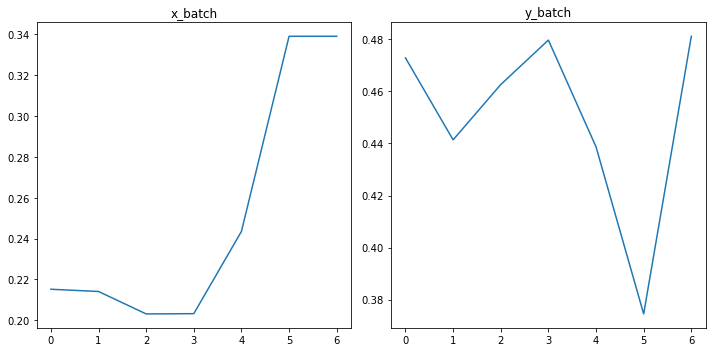

In [17]:
batch = 10  # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
seq2 = y_batch[batch, :, signal]


fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(seq)
ax[0].set_title("x_batch")
ax[1].plot(seq2)
ax[1].set_title("y_batch")
fig.tight_layout() 


In [18]:
validation_data = (np.expand_dims(x_test, axis=0),np.expand_dims(y_test, axis=0))

print("x_test shape:",validation_data[0].shape)
print("y_test shape:",validation_data[1].shape)

x_test shape: (1, 1107, 35)
y_test shape: (1, 1107, 1)


In [19]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(None,num_x_feature),
              activation='relu'))
model.add(LSTM(128,return_sequences=True))
model.add(Dense(num_y_feature,activation='relu'))
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 128)         83968     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dense (Dense)                (None, None, 1)           129       
Total params: 215,681
Trainable params: 215,681
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x=generator,
          epochs=100,
          steps_per_epoch=10,validation_data=validation_data)

Epoch 1/100
10/10 [==============================] - 2s 197ms/step - loss: nan - accuracy: 2.7902e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 1s 110ms/step - loss: nan - accuracy: 5.5804e-05 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 1s 91ms/step - loss: nan - accuracy: 2.7902e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 1s 99ms/step - loss: nan - accuracy: 5.5804e-05 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 1s 97ms/step - loss: nan - accuracy: 2.2321e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 1s 149ms/step - loss: nan - accuracy: 3.9063e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 2s 185ms/step - loss: nan - accuracy: 1.6741e-04 - val_loss: nan - val_accuracy:

10/10 [==============================] - 1s 96ms/step - loss: nan - accuracy: 5.5804e-05 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 58/100
10/10 [==============================] - 1s 89ms/step - loss: nan - accuracy: 2.7902e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 59/100
10/10 [==============================] - 2s 163ms/step - loss: nan - accuracy: 4.4643e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/100
10/10 [==============================] - 1s 101ms/step - loss: nan - accuracy: 1.6741e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 61/100
10/10 [==============================] - 1s 85ms/step - loss: nan - accuracy: 3.3482e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 62/100
10/10 [==============================] - 1s 119ms/step - loss: nan - accuracy: 2.7902e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 63/100
10/10 [==============================] - 1s 89ms/step - loss: nan - accuracy: 2.2321e-04 - val_loss: nan - val_accuracy: 0.0000

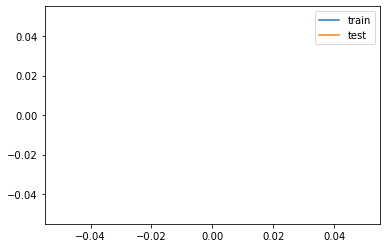

In [21]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

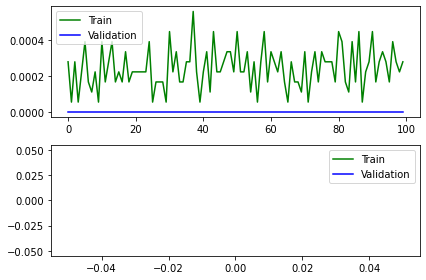

In [22]:
plt.subplot(211)
#
plt.plot(history.history['accuracy'],color="g", label="Train" )
plt.plot(history.history['val_accuracy'],color="b", label="Validation" )
plt.legend(loc='best')

plt.subplot(212)
#
plt.plot(history.history['loss'], color = 'g', label='Train')
plt.plot(history.history['val_loss'], color = 'b', label='Validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show